In [1]:
# =============================================================================
# # OPTIMUM TRAINNING PROCESS MODEL
# =============================================================================

# MODEL İÇİN GEREKLİ KÜTÜPHANELERİ TANIMLAYALIM

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
# =============================================================================
# # STEP 1: IDENTIFICATION OF MISSING DATA
# =============================================================================

# Get Data

df = pd.read_csv(r"C:\Users\erdal\Desktop\Uncleaned_employees_final_dataset (1).csv")

In [3]:
# Check Data

df.shape

df.info()
 
pd.isnull(df).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [4]:
# Delete Unnecassary Data

df.drop(['employee_id', 'KPIs_met_more_than_80', 'awards_won'], axis=1, inplace=True)

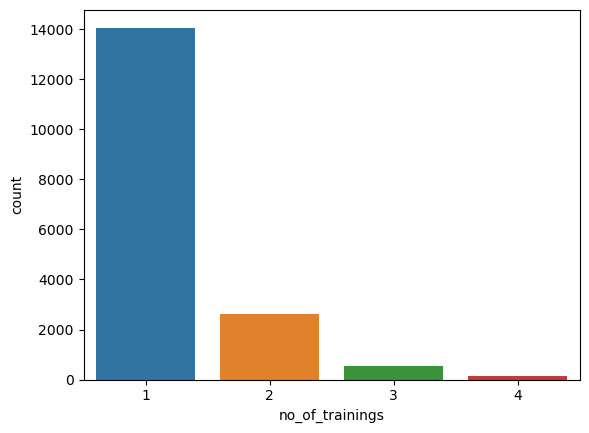

In [5]:
# Target Analysis

df["no_of_trainings"].value_counts
df["no_of_trainings"].mean()
df["no_of_trainings"].max()

df = df[df["no_of_trainings"] < 5]

sns.countplot(x="no_of_trainings", data=df)
plt.show()

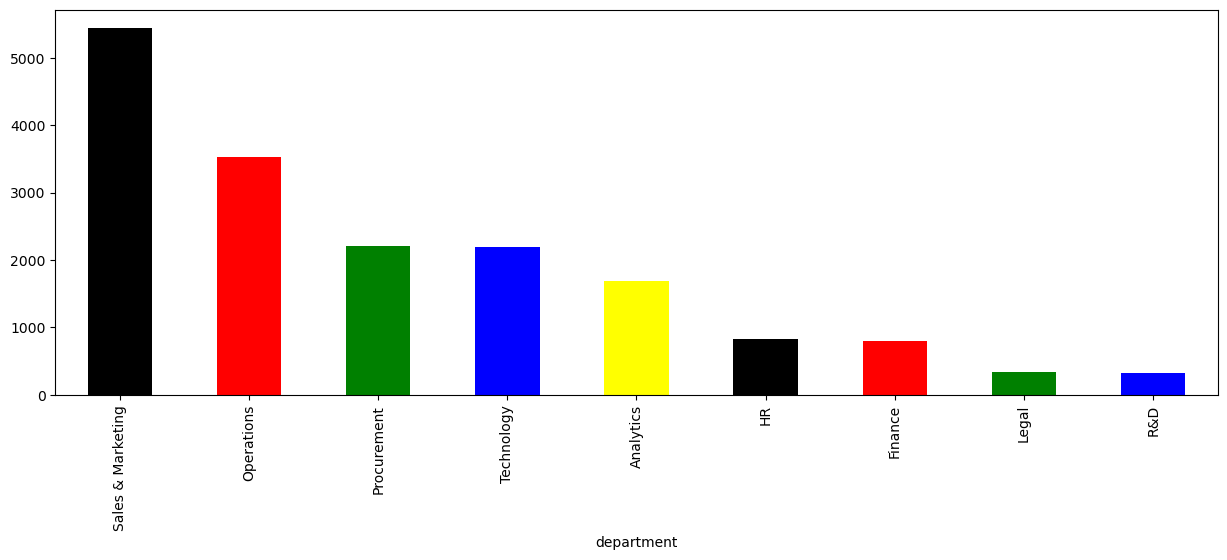

In [6]:
# Finding The Missing Data

df["department"].value_counts()

# Visulazing of "department" variables distrubution
plt.subplots(figsize=(15,5))
df['department'].value_counts(normalize = True)
df['department'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'green', 'blue', 'yellow'])
plt.show()

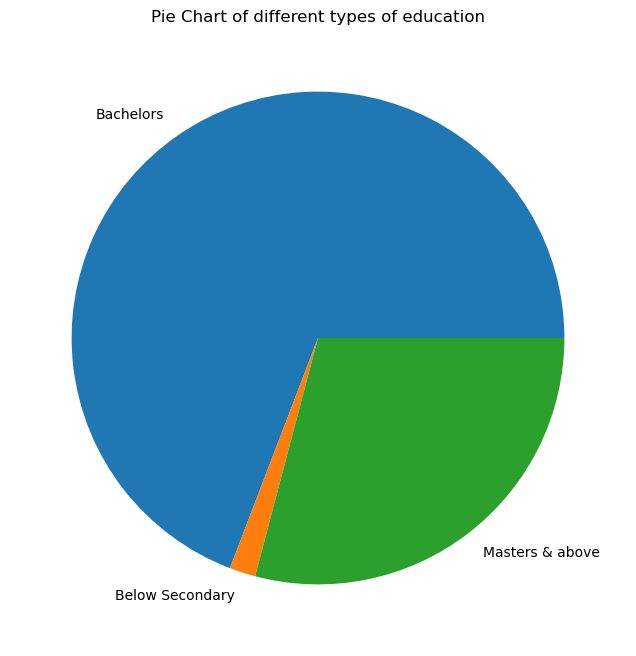

In [8]:
df["region"].value_counts()
df["education"].value_counts()

ed = df.groupby('education').size()

ed.plot(kind='pie', subplots=True, figsize=(15, 8))
plt.title("Pie Chart of different types of education")
plt.ylabel("")
plt.show()


In [ ]:
df["gender"].value_counts()

size = [38496, 16312]
labels = "Male", "Female"
colors = ['yellow', 'orange']
explode = [0, 0.1]

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing GenderGap', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

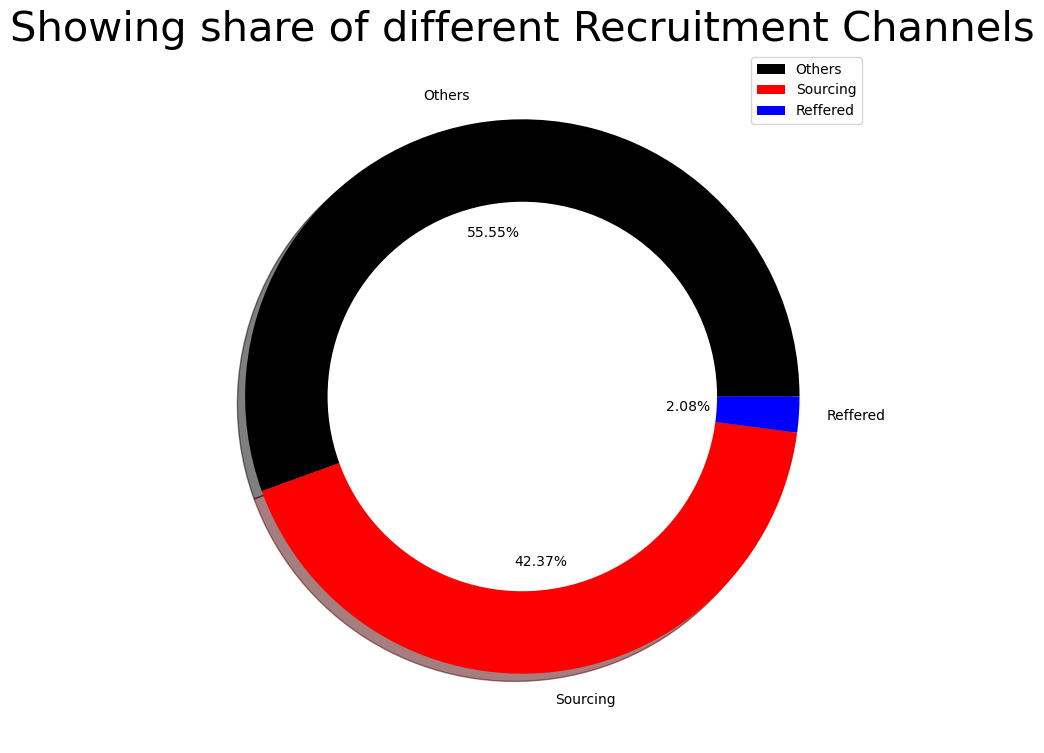

In [9]:
df["recruitment_channel"].value_counts()

size = [30446, 23220, 1142]
colors = ['black', 'red', 'blue']
labels = "Others", "Sourcing", "Reffered"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [ ]:
df["age"].value_counts()

# Visulazing of Distribution of Age of Employees
plt.subplots(figsize=(15,5))
sns.distplot(df['age'])
plt.title('Distribution of Age of Employees', fontsize = 30)

In [ ]:
df["previous_year_rating"].value_counts()

df['previous_year_rating'].value_counts().sort_values().plot.bar(color = 'violet', figsize = (15, 7))
plt.title('Distribution of Previous year rating of the Employees', fontsize = 30)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count')
plt.show()

In [ ]:
df["length_of_service"].value_counts()

# Visulazing of Distribution of length of service among the Employees
plt.subplots(figsize=(15,8))
sns.distplot(df['length_of_service'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 30)
plt.xlabel('Length of Service in years')
plt.ylabel('count')
plt.show()

In [ ]:
df['avg_training_score'].value_counts()

# Visulazing of Distribution of Training Score among the Employees
plt.subplots(figsize=(15,7))
sns.distplot(df['avg_training_score'], color = 'blue')
plt.title('Distribution of Training Score among the Employees', fontsize = 30)
plt.xlabel('Average Training Score', fontsize = 20)
plt.ylabel('count')
plt.show()

In [ ]:
# Visulazing of null datas
msno.bar(df, color = 'y', figsize = (10,8))

pd.isnull(df).sum()

In [10]:
# Mode Strategy 

def mode_strategy(df, columns):
    
    for column in columns:
        df[column] = df[column].fillna(df[column].mode()[0])

mode_strategy(df, ["education"])

# Mean Strategy

def mode_strategy(df, columns):
    
    for column in columns:
        df[column] = df[column].fillna(df[column].mean())

mode_strategy(df, ["previous_year_rating"])

pd.isnull(df).sum()


department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
avg_training_score      0
dtype: int64

In [11]:
# =============================================================================
# # STEP 2: CONVERSION OF CATEGORICAL DATA TO NUMERIC
# =============================================================================

num_col = df.select_dtypes(include=['int', 'float']).columns
obj_col = df.select_dtypes(include=['object']).columns

obj_col.value_counts()
transformed = LabelEncoder()

for i in obj_col:
    df[i] = transformed.fit_transform(df[i])

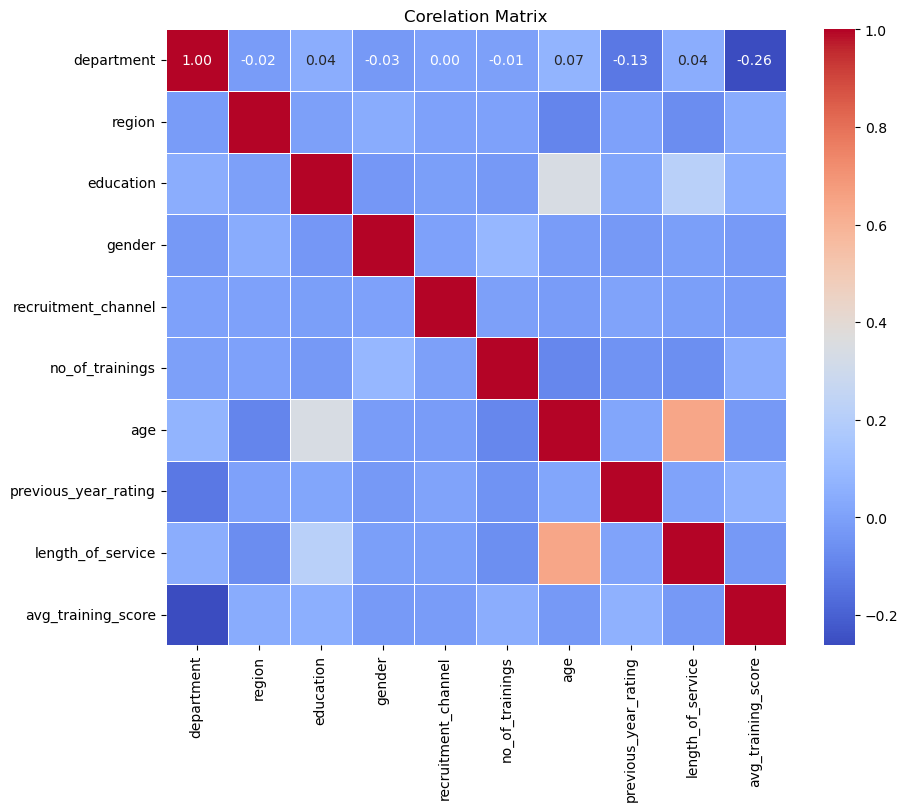

In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Corelation Matrix')
plt.show()

In [13]:
# =============================================================================
# # STEP 3: FINDING OUTLIERS VALUES
# =============================================================================

lof = LocalOutlierFactor()
outliers = lof.fit_predict(df)

print(outliers[1:1001])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

C:\Users\erdal\AppData\Local\Temp\ipykernel_22500\1984078726.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.967808810826375' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.iloc[index] = df.mean()
C:\Users\erdal\AppData\Local\Temp\ipykernel_22500\1984078726.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15.491275554275843' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.iloc[index] = df.mean()
C:\Users\erdal\AppData\Local\Temp\ipykernel_22500\1984078726.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5726461272674921' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.iloc[index] = df.mean()
C:\Users\erdal\AppData\Local\Temp\i

In [ ]:
# =============================================================================
# # STEP 4: IRREGULAR DATA DETECTION
# =============================================================================

X = df.drop(['Training Duration(Days)'], axis=1)
y = df['Training Duration(Days)']


smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y) 

print("Distrubution of classes:\n", pd.crosstab(y, columns='count'))

In [ ]:
# =============================================================================
# # STEP 5: PCA
# =============================================================================

scaler = StandardScaler()

X_scl = scaler.fit_transform(X)

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scl)

X_pca.shape

In [ ]:
# =============================================================================
# # STEP 6: TRAIN-TEST SPLIT
# =============================================================================

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
# =============================================================================
# # STEP 7: LOGISTIC REGRESSION
# =============================================================================

log_model = LogisticRegression()
log_model.fit(X_train, y_train)


In [ ]:
# =============================================================================
# # MODEL EVALUATION
# =============================================================================

# ACC Score 

y_pred = log_model.predict(X_test)

train_accuracy = log_model.score(X_train, y_train)
test_accuracy = log_model.score(X_test, y_test)

print("train_accuracy: ", train_accuracy)
print("test_accuracy: ", test_accuracy)

print(classification_report(y_test, y_pred))

In [ ]:
# =============================================================================
# # STEP 8: MULTIPLE LINEAR REGRESSION
# =============================================================================

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


In [ ]:
# =============================================================================
# # MODEL EVALUATION
# =============================================================================

# ACC Score 

y_pred = reg_model.predict(X_test)

train_accuracy = reg_model.score(X_train, y_train)
test_accuracy = reg_model.score(X_test, y_test)

print("train_accuracy: ", train_accuracy)
print("test_accuracy: ", test_accuracy)

np.sqrt(mean_squared_error(y, y_pred)) 

In [ ]:
# =============================================================================
# # STEP 9: SVM
# =============================================================================

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ", accuracy) 

In [ ]:
# =============================================================================
# # STEP 12: XG-BOOST
# =============================================================================

xg_model = XGBRegressor()
xg_model.fit(X_train, y_train, verbose=False)

y_pred = xg_model.predict(X_test)

# Modelin performansını değerlendirme
print("MAE: " + str(mean_absolute_error(y_pred, y_test)))

train_accuracy = xg_model.score(X_train, y_train)
test_accuracy = xg_model.score(X_test, y_test)

print("train_accuracy: ", train_accuracy)
print("test_accuracy: ", test_accuracy)

np.sqrt(mean_squared_error(y, y_pred)) 